# Week 10: Colab Experiment

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I. Introduction
In this exercise, we apply CNN to MNIST data to classify the hand written digits.

In [28]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random


# Data Loading
Load the data from the MNIST dataset

In [29]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Visualize dataset sample
Show some sample.

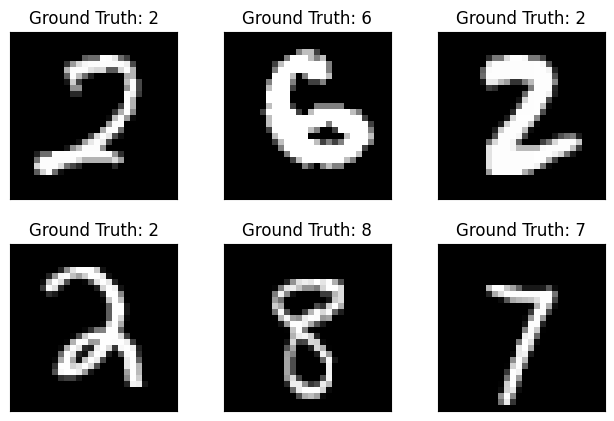

In [30]:

# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# II. Methods


In [31]:
from os import X_OK

# This class implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x



In [32]:
# TODO Change above Net to Net2 class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

class Net2(nn.Module):
    def __init__(self):
      super(Net2, self).__init__()
      # Valid convolution with kernel size 5, 1 input channel and 10 output channels
      self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
      # Valid convolution with kernel size 5, 10 input channel and 20 output channels
      self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
      # 2D Dropout layer
      self.drop = nn.Dropout2d()
      # Fully connected layer mapping from 320 (found through .shape) to 50 dimensions
      self.fc1 = nn.Linear(320, 50)
      # Fully connected layer mapping from 50 to 10 dimensions
      self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
        x = self.conv1(x)
        # 2. A max pooling operation over a 2x2 area
        x = F.max_pool2d(x,2)
        # 3. A Relu
        x = F.relu(x)
        # 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
        x = self.conv2(x)
        # 5. A 2D Dropout layer
        x = self.drop(x)
        # 6. A max pooling operation over a 2x2 area
        x = F.max_pool2d(x,2)
        # 7. A relu
        x = F.relu(x)
        # 8. A flattening operation
        x = x.flatten(1)
        # 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
        x = self.fc1(x)
        # 10. A ReLU
        x = F.relu(x)
        # 11. A fully connected layer mapping from 50 to 10 dimensions
        x = self.fc2(x)
        # 12. A softmax function.
        x = F.log_softmax(x)

        return x



In [33]:

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [34]:
#list to keep track of all the loss while training
all_losses = [[[],[]]for _ in range(10)]

In [35]:
# Main training routine

# TODO: Read it and understand what it does, you would need to implement it in the next colab H
def train(epoch, model):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:

      pred = output.data.max(1, keepdim=True)[1]
      correct = pred.eq(target.data.view_as(pred)).sum()
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))
      #store the lost into loss_net
      all_losses[epoch-1][0].append(batch_idx * len(data))
      all_losses[epoch-1][1].append(loss.item())


In [36]:
# Run on test data
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW
def test(model):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

<ipython-input-31-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



Test set: Avg. loss: 2.6179, Accuracy: 908/10000 (9%)

Train Epoch: 1 [0/60000]	Loss: 2.964846
Train Epoch: 1 [640/60000]	Loss: 2.277486
Train Epoch: 1 [1280/60000]	Loss: 2.282374
Train Epoch: 1 [1920/60000]	Loss: 2.094316
Train Epoch: 1 [2560/60000]	Loss: 2.157571
Train Epoch: 1 [3200/60000]	Loss: 1.778199
Train Epoch: 1 [3840/60000]	Loss: 1.949990
Train Epoch: 1 [4480/60000]	Loss: 1.849530
Train Epoch: 1 [5120/60000]	Loss: 1.761423
Train Epoch: 1 [5760/60000]	Loss: 1.501531
Train Epoch: 1 [6400/60000]	Loss: 1.593675
Train Epoch: 1 [7040/60000]	Loss: 1.630074
Train Epoch: 1 [7680/60000]	Loss: 1.341123
Train Epoch: 1 [8320/60000]	Loss: 1.624348
Train Epoch: 1 [8960/60000]	Loss: 1.467659
Train Epoch: 1 [9600/60000]	Loss: 1.517885
Train Epoch: 1 [10240/60000]	Loss: 1.232546
Train Epoch: 1 [10880/60000]	Loss: 1.447810
Train Epoch: 1 [11520/60000]	Loss: 1.101816
Train Epoch: 1 [12160/60000]	Loss: 1.282110
Train Epoch: 1 [12800/60000]	Loss: 1.332895
Train Epoch: 1 [13440/60000]	Loss: 1.345

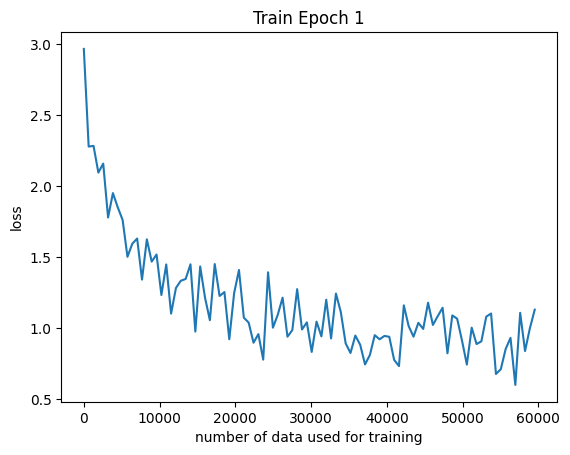

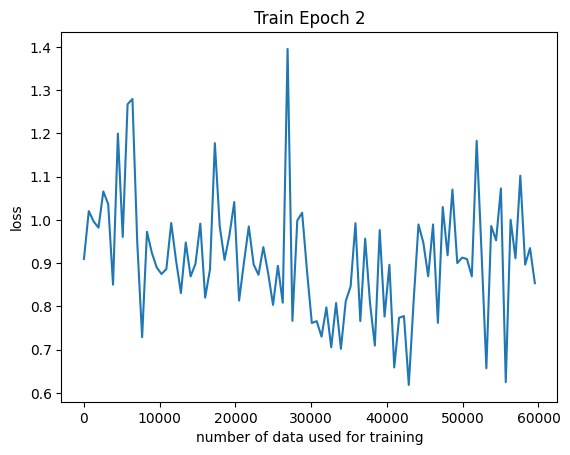

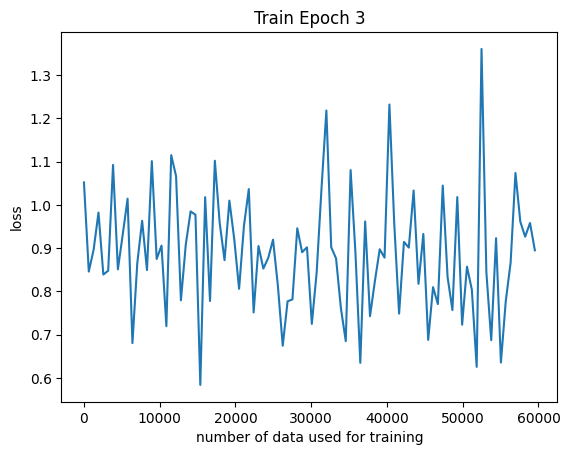

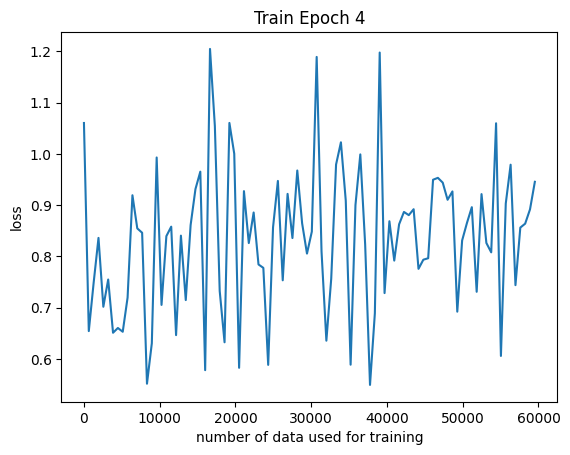

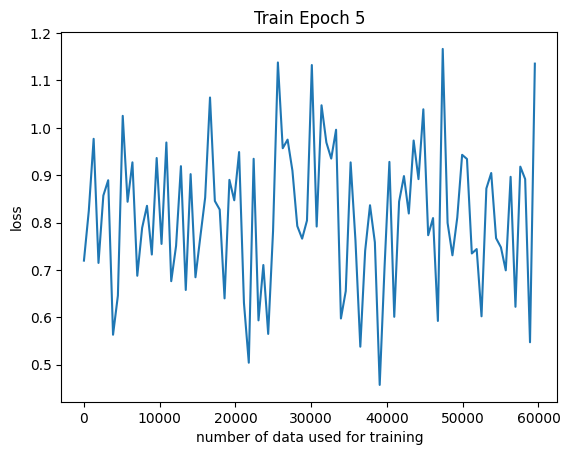

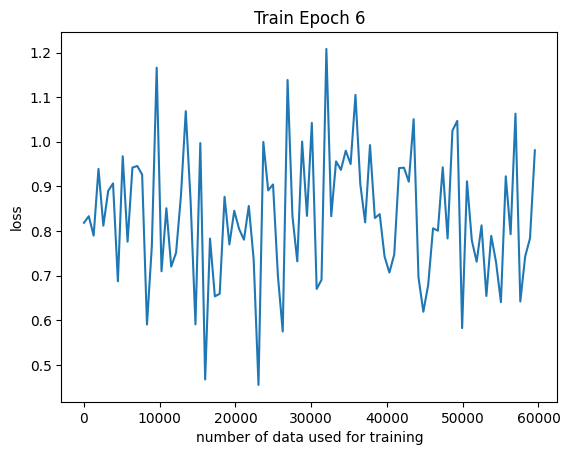

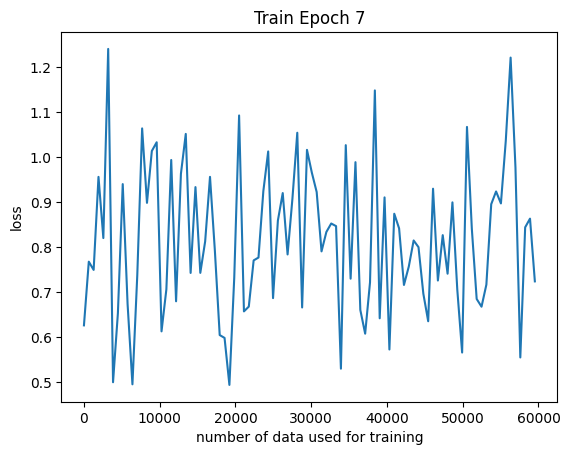

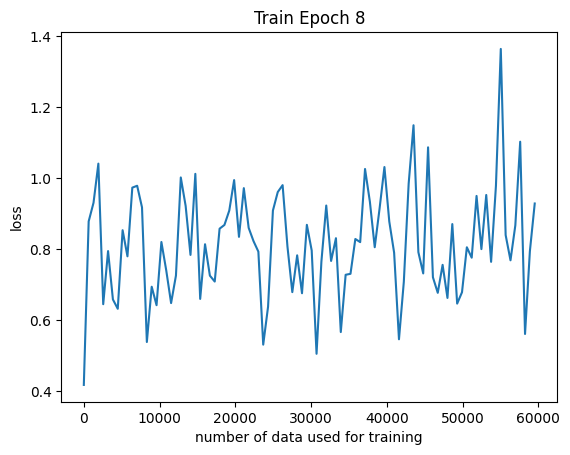

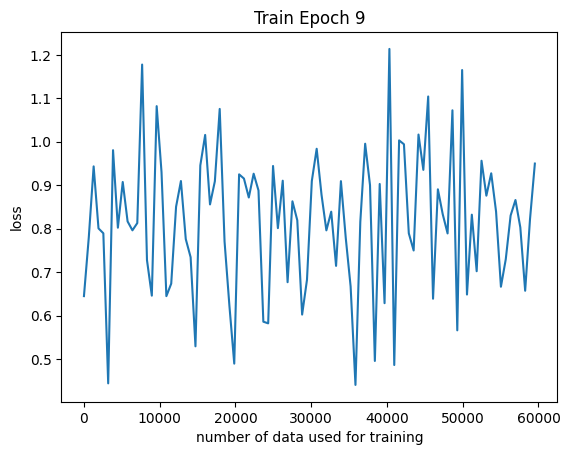

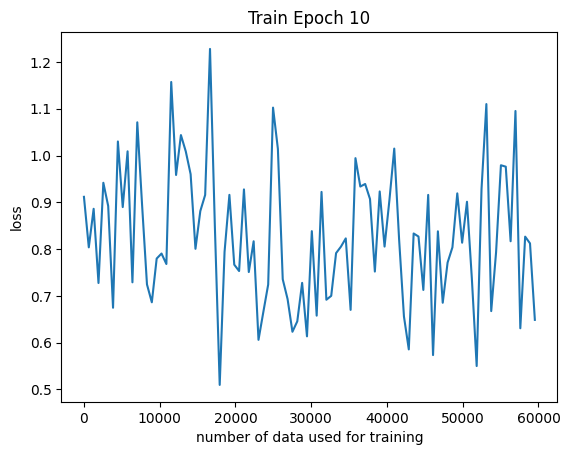


Test set: Avg. loss: 0.2250, Accuracy: 9361/10000 (94%)



In [37]:
# Train and test Model 1

# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model)

#create a graph to show how the loss change during training for Net1

for i in range(n_epochs):
  plt.figure()
  plt.plot(all_losses[i][0], all_losses[i][1])
  plt.title("Train Epoch {}".format(i+1))
  plt.xlabel("number of data used for training")
  plt.ylabel("loss")
  plt.show()

accuracy1 = test(model)

In [38]:
#reset the all_losses list for next model
all_losses = [[[],[]]for _ in range(10)]

<ipython-input-32-39afe4c229bf>:53: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



Test set: Avg. loss: 2.5720, Accuracy: 980/10000 (10%)

Train Epoch: 1 [0/60000]	Loss: 2.471043
Train Epoch: 1 [640/60000]	Loss: 2.242950
Train Epoch: 1 [1280/60000]	Loss: 2.133890
Train Epoch: 1 [1920/60000]	Loss: 1.935888
Train Epoch: 1 [2560/60000]	Loss: 1.890218
Train Epoch: 1 [3200/60000]	Loss: 1.723350
Train Epoch: 1 [3840/60000]	Loss: 1.312557
Train Epoch: 1 [4480/60000]	Loss: 1.068389
Train Epoch: 1 [5120/60000]	Loss: 1.046014
Train Epoch: 1 [5760/60000]	Loss: 1.089445
Train Epoch: 1 [6400/60000]	Loss: 0.816032
Train Epoch: 1 [7040/60000]	Loss: 0.963359
Train Epoch: 1 [7680/60000]	Loss: 1.124260
Train Epoch: 1 [8320/60000]	Loss: 0.820503
Train Epoch: 1 [8960/60000]	Loss: 0.827393
Train Epoch: 1 [9600/60000]	Loss: 0.764934
Train Epoch: 1 [10240/60000]	Loss: 0.618037
Train Epoch: 1 [10880/60000]	Loss: 0.772338
Train Epoch: 1 [11520/60000]	Loss: 0.669467
Train Epoch: 1 [12160/60000]	Loss: 0.531035
Train Epoch: 1 [12800/60000]	Loss: 0.542974
Train Epoch: 1 [13440/60000]	Loss: 0.74

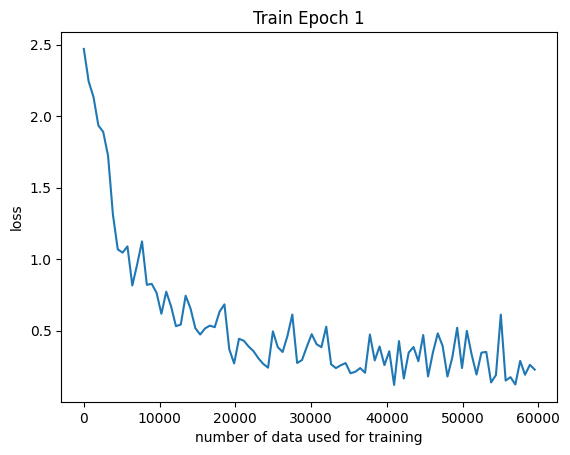

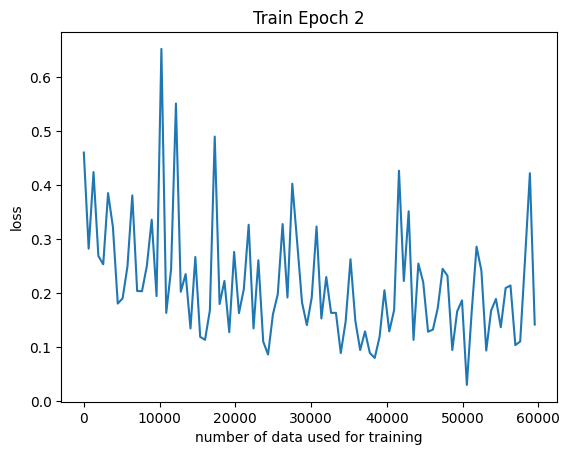

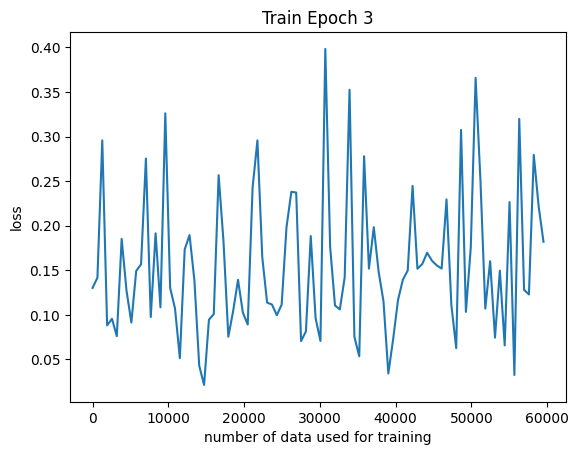

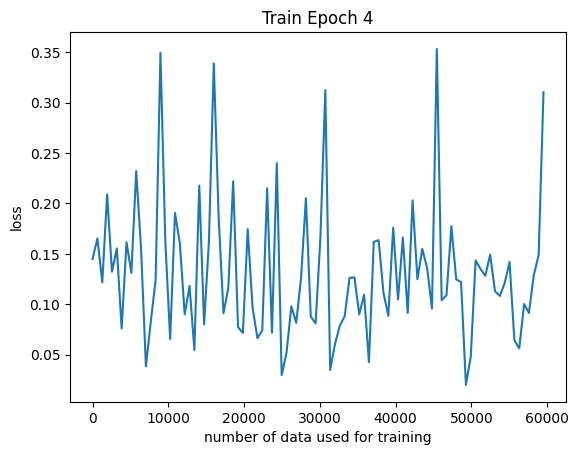

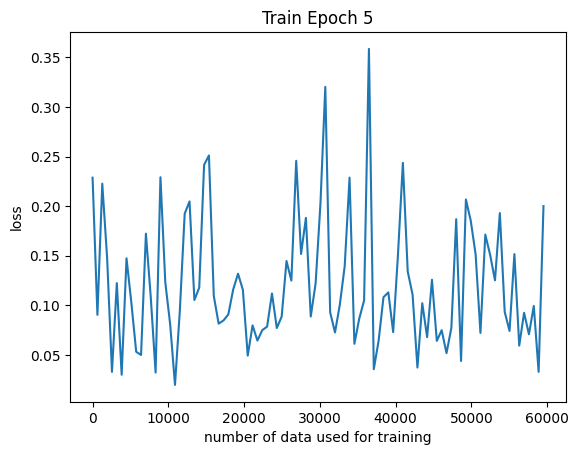

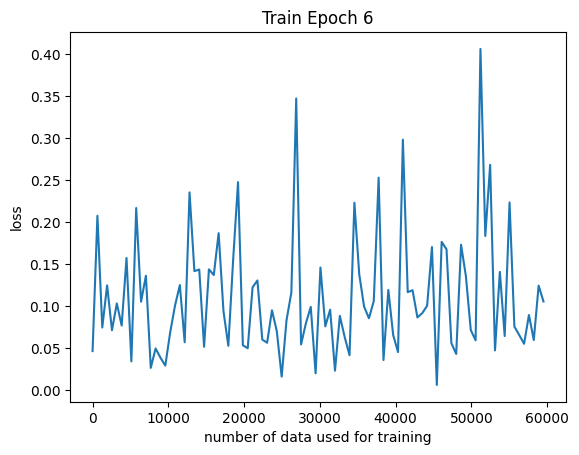

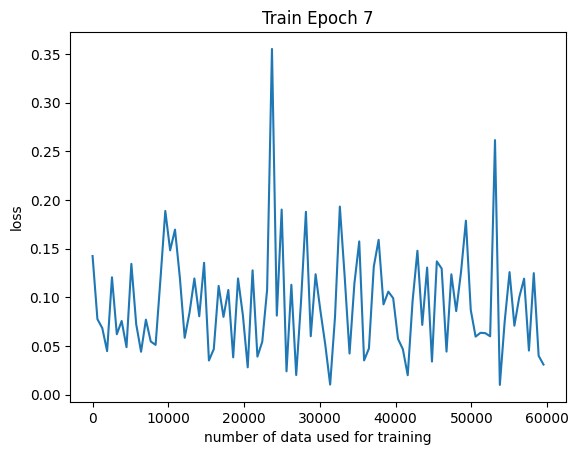

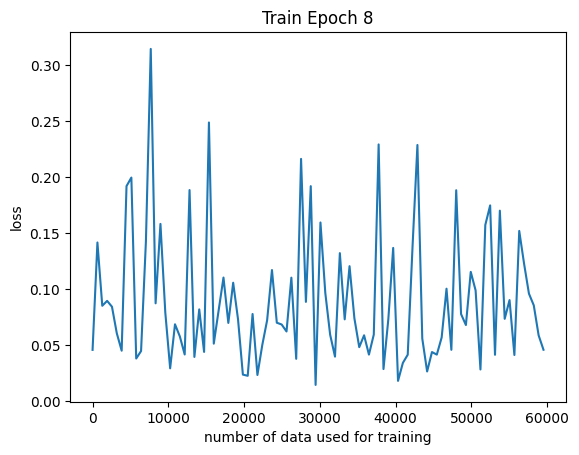

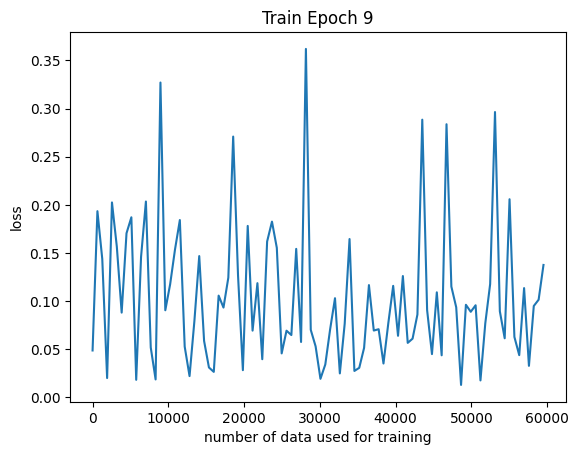

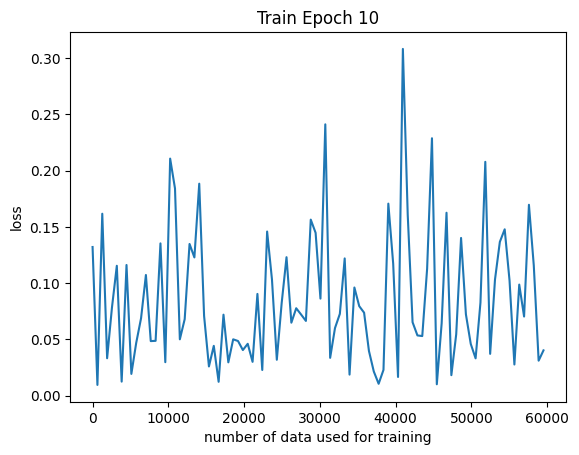


Test set: Avg. loss: 0.0437, Accuracy: 9856/10000 (99%)



In [39]:
# Train and test Model 2

# Create network
model2 = Net2()
# Initialize model weights
model2.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model2)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model2)

#create a graph to show how the loss change during training for Net2
for i in range(n_epochs):
  plt.figure()
  plt.plot(all_losses[i][0], all_losses[i][1])
  plt.title("Train Epoch {}".format(i+1))
  plt.xlabel("number of data used for training")
  plt.ylabel("loss")
  plt.show()

accuracy2 = test(model2)

## III. Results

Here we train the CNN model and apply it to the test set. There are 10 epochs in training. There is no validation set here, we simply take the model at the end of the training procedure.

In [40]:
print(f"Model 1 Accuracy: {round(float(accuracy1.numpy()),2)}%")
print(f"Model 2 Accuracy: {round(float(accuracy2.numpy()),2)}%")

Model 1 Accuracy: 93.61%
Model 2 Accuracy: 98.56%


<ipython-input-31-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


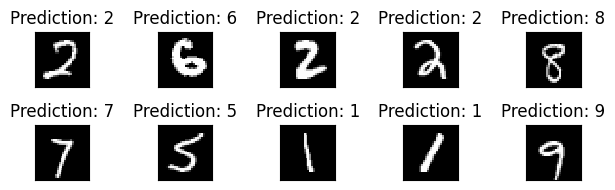

In [41]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

<ipython-input-32-39afe4c229bf>:53: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


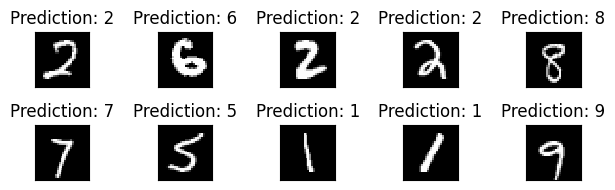

In [42]:
# Run network on data we got before and show predictions
output = model2(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# IV. Conclusion and Discussion

# Write something

Net2 is more accurate than Net, with Net2 having a 98.56% accuracy while Net only got 93.61% acccuracy.

This is because Net2 has more layers and much bigger parameters than Net, allowing Net2 to be able to capture more patterns than Net. The increasing number of output channels (in convolutional layer) in Net2 also make Net2 to understand more complex features.

I tried making figures to see how the loss changes while training. It turns out that the loss tend to decrease drastically in epoch 1, but afterward, as the number of epoch increase, the loss just flunctuate. I think this is because during the first epoch, the stochastic gradient descent make substantial change to the weight parameters, while in future epochs, the model already converges to minima and can no longer decrease drastically.
